In [1]:
#Importing the necessary Libraries
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc , recall_score, precision_score , accuracy_score ,f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading the clean data
df = pd.read_csv('Data/final_df.csv',index_col=0)
df

,date,home_team,home_score,home_team.Rank,home_team_Avg. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_Poss,...,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK,goal_difference,match_result
0,2010-03-03,Iran,1,21,28.1,74380000.0,1573,15.500000,27.600000,32.0,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
1,2013-10-15,Iran,2,21,28.1,74380000.0,1573,15.500000,27.600000,32.0,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
2,2013-03-17,Qatar,1,52,26.7,14430000.0,1438,21.666667,26.633333,NaN,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
3,2019-01-10,Bahrain,0,89,27.9,7830000.0,1264,29.666667,27.900000,NaN,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,2
4,2010-12-07,Indonesia,2,160,23.3,5280000.0,1002,25.500000,23.100000,NaN,...,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2011-09-02,Guyana,2,175,25.5,775000.0,959,20.000000,27.300000,NaN,...,0.5,5.5,0.0,0.50,0.00,0.5,0.25,0.25,2,1
6015,2011-11-11,Bermuda,2,166,26.2,2830000.0,982,14.000000,25.100000,NaN,...,0.5,5.5,0.0,0.50,0.00,0.5,0.25,0.25,1,1
6016,2011-11-14,Bermuda,2,166,26.2,2830000.0,982,14.000000,25.100000,NaN,...,0.5,5.5,0.0,0.50,0.00,0.5,0.25,0.25,1,1
6017,2017-10-28,Bermuda,2,166,26.2,2830000.0,982,14.000000,25.100000,NaN,...,0.5,5.5,0.0,0.50,0.00,0.5,0.25,0.25,1,2


In [3]:
#check the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   6019 non-null   object 
 1   home_team              6019 non-null   object 
 2   home_score             6019 non-null   int64  
 3   home_team.Rank         6019 non-null   int64  
 4   home_team_Avg. age     6019 non-null   float64
 5   home_team.Total value  6019 non-null   float64
 6   home_team.Points       6019 non-null   int64  
 7   home_Pl                6019 non-null   float64
 8   home_Age               6019 non-null   float64
 9   home_Poss              2457 non-null   float64
 10  home_MP                6019 non-null   float64
 11  home_Starts            6019 non-null   float64
 12  home_Min               6019 non-null   float64
 13  home_90s               6019 non-null   float64
 14  home_Gls               6019 non-null   float64
 15  home

In [4]:
#rename column titles
df.rename(columns={'home_team_Avg. age':'home_team. age'},inplace=True)
df.rename(columns={'home_team':'home_team.name'},inplace=True)
df.rename(columns={'away_team':'away_team.name'},inplace=True)

In [5]:
#drop unnecessary columns as tournament, date and columns that had many null values as home_Poss, away_Poss,
# I imputed the null values with the average value but after training the model it is better to drop them.
df1 = df.drop(['goal_difference','home_score','away_score','date','home_Poss','away_Poss'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   home_team.name         6019 non-null   object 
 1   home_team.Rank         6019 non-null   int64  
 2   home_team. age         6019 non-null   float64
 3   home_team.Total value  6019 non-null   float64
 4   home_team.Points       6019 non-null   int64  
 5   home_Pl                6019 non-null   float64
 6   home_Age               6019 non-null   float64
 7   home_MP                6019 non-null   float64
 8   home_Starts            6019 non-null   float64
 9   home_Min               6019 non-null   float64
 10  home_90s               6019 non-null   float64
 11  home_Gls               6019 non-null   float64
 12  home_Ast               6019 non-null   float64
 13  home_G-PK              6019 non-null   float64
 14  home_PK                6019 non-null   float64
 15  home

In [6]:
#checking the column names
df1.columns

Index(['home_team.name', 'home_team.Rank', 'home_team. age',
       'home_team.Total value', 'home_team.Points', 'home_Pl', 'home_Age',
       'home_MP', 'home_Starts', 'home_Min', 'home_90s', 'home_Gls',
       'home_Ast', 'home_G-PK', 'home_PK', 'home_PKatt', 'home_CrdY',
       'home_CrdR', 'home_Gls.1', 'home_Ast.1', 'home_G+A', 'home_G-PK.1',
       'home_G+A-PK', 'away_team.name', 'away_team.Rank', 'away_team. age',
       'away_team.Total value', 'away_team.Points', 'away_Pl', 'away_Age',
       'away_MP', 'away_Starts', 'away_Min', 'away_90s', 'away_Gls',
       'away_Ast', 'away_G-PK', 'away_PK', 'away_PKatt', 'away_CrdY',
       'away_CrdR', 'away_Gls.1', 'away_Ast.1', 'away_G+A', 'away_G-PK.1',
       'away_G+A-PK', 'match_result'],
      dtype='object')

In [7]:
#make 3 dataframes for home and away teams for later assigning data to each team name
home_team_df = df1[['home_team.name', 'home_team.Rank', 'home_team. age',
       'home_team.Total value', 'home_team.Points', 'home_Pl', 'home_Age',
        'home_MP', 'home_Starts', 'home_Min', 'home_90s',
       'home_Gls', 'home_Ast', 'home_G-PK', 'home_PK', 'home_PKatt',
       'home_CrdY', 'home_CrdR', 'home_Gls.1', 'home_Ast.1', 'home_G+A',
       'home_G-PK.1', 'home_G+A-PK']]

away_team_df = df1[['away_team.name', 'away_team.Rank',
       'away_team. age', 'away_team.Total value', 'away_team.Points',
       'away_Pl', 'away_Age', 'away_MP', 'away_Starts',
       'away_Min', 'away_90s', 'away_Gls', 'away_Ast', 'away_G-PK', 'away_PK',
       'away_PKatt', 'away_CrdY', 'away_CrdR', 'away_Gls.1', 'away_Ast.1',
       'away_G+A', 'away_G-PK.1', 'away_G+A-PK']]

#set index as team name
home_team_df = home_team_df.set_index(home_team_df['home_team.name']).drop('home_team.name',axis=1)
away_team_df = away_team_df.set_index(away_team_df['away_team.name']).drop('away_team.name',axis=1)

home_team_df.head()

,home_team.Rank,home_team. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_MP,home_Starts,home_Min,home_90s,...,home_G-PK,home_PK,home_PKatt,home_CrdY,home_CrdR,home_Gls.1,home_Ast.1,home_G+A,home_G-PK.1,home_G+A-PK
home_team.name,,,,,,,,,,,,,,,,,,,,,
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.500000,0.500000,5.500000,0.0,0.330,0.165000,0.500000,0.165000,0.335
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.500000,0.500000,5.500000,0.0,0.330,0.165000,0.500000,0.165000,0.335
Qatar,52,26.7,14430000.0,1438,21.666667,26.633333,5.333333,58.666667,480.0,5.333333,...,3.666667,1.000000,1.000000,10.333333,1.0,0.940,0.603333,1.540000,0.633333,1.230
Bahrain,89,27.9,7830000.0,1264,29.666667,27.900000,5.333333,58.666667,480.0,5.333333,...,9.000000,2.666667,3.333333,5.666667,0.0,2.090,0.833333,2.926667,1.676667,2.510
Indonesia,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,225.0,2.500000,...,4.000000,1.000000,1.000000,3.000000,0.0,2.085,0.500000,2.585000,1.665000,2.165


In [8]:
home_team_df.shape

(6019, 22)

#### Making the 2 similar dataframes, one with home team titles and one with the away team titles

In [9]:
cols = home_team_df.columns
cols2 = away_team_df.columns

In [10]:
away_team_df.columns=cols
df_2 = pd.concat([home_team_df, away_team_df], axis=0)
df_2.shape

(12038, 22)

In [11]:
away_team_df.columns=cols2
home_team_df.columns=cols2

df_3 = pd.concat([home_team_df, away_team_df], axis=0)
df_3.shape

(12038, 22)

In [12]:
display(df_2.head())
display(df_3.head())

,home_team.Rank,home_team. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_MP,home_Starts,home_Min,home_90s,...,home_G-PK,home_PK,home_PKatt,home_CrdY,home_CrdR,home_Gls.1,home_Ast.1,home_G+A,home_G-PK.1,home_G+A-PK
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.500000,0.500000,5.500000,0.0,0.330,0.165000,0.500000,0.165000,0.335
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.500000,0.500000,5.500000,0.0,0.330,0.165000,0.500000,0.165000,0.335
Qatar,52,26.7,14430000.0,1438,21.666667,26.633333,5.333333,58.666667,480.0,5.333333,...,3.666667,1.000000,1.000000,10.333333,1.0,0.940,0.603333,1.540000,0.633333,1.230
Bahrain,89,27.9,7830000.0,1264,29.666667,27.900000,5.333333,58.666667,480.0,5.333333,...,9.000000,2.666667,3.333333,5.666667,0.0,2.090,0.833333,2.926667,1.676667,2.510
Indonesia,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,225.0,2.500000,...,4.000000,1.000000,1.000000,3.000000,0.0,2.085,0.500000,2.585000,1.665000,2.165


,away_team.Rank,away_team. age,away_team.Total value,away_team.Points,away_Pl,away_Age,away_MP,away_Starts,away_Min,away_90s,...,away_G-PK,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.500000,0.500000,5.500000,0.0,0.330,0.165000,0.500000,0.165000,0.335
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.500000,0.500000,5.500000,0.0,0.330,0.165000,0.500000,0.165000,0.335
Qatar,52,26.7,14430000.0,1438,21.666667,26.633333,5.333333,58.666667,480.0,5.333333,...,3.666667,1.000000,1.000000,10.333333,1.0,0.940,0.603333,1.540000,0.633333,1.230
Bahrain,89,27.9,7830000.0,1264,29.666667,27.900000,5.333333,58.666667,480.0,5.333333,...,9.000000,2.666667,3.333333,5.666667,0.0,2.090,0.833333,2.926667,1.676667,2.510
Indonesia,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,225.0,2.500000,...,4.000000,1.000000,1.000000,3.000000,0.0,2.085,0.500000,2.585000,1.665000,2.165


In [13]:
#saving the dataframes to use later in the model file for deployment
df_2.to_csv('df_home_all2.csv')
df_3.to_csv('df_away_all2.csv')

In [14]:
df_2 = pd.read_csv('df_home_all2.csv',index_col=[0])
df_3 = pd.read_csv('df_away_all2.csv',index_col=[0])

In [15]:
df_2

,home_team.Rank,home_team. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_MP,home_Starts,home_Min,home_90s,...,home_G-PK,home_PK,home_PKatt,home_CrdY,home_CrdR,home_Gls.1,home_Ast.1,home_G+A,home_G-PK.1,home_G+A-PK
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.500000,0.500000,5.500000,0.0,0.330,0.165000,0.500000,0.165000,0.335
Iran,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,270.0,3.000000,...,0.500000,0.500000,0.500000,5.500000,0.0,0.330,0.165000,0.500000,0.165000,0.335
Qatar,52,26.7,14430000.0,1438,21.666667,26.633333,5.333333,58.666667,480.0,5.333333,...,3.666667,1.000000,1.000000,10.333333,1.0,0.940,0.603333,1.540000,0.633333,1.230
Bahrain,89,27.9,7830000.0,1264,29.666667,27.900000,5.333333,58.666667,480.0,5.333333,...,9.000000,2.666667,3.333333,5.666667,0.0,2.090,0.833333,2.926667,1.676667,2.510
Indonesia,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,225.0,2.500000,...,4.000000,1.000000,1.000000,3.000000,0.0,2.085,0.500000,2.585000,1.665000,2.165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Barbados,163,23.0,0.0,996,18.500000,24.450000,2.000000,22.000000,180.0,2.000000,...,0.500000,0.500000,0.500000,5.500000,0.0,0.500,0.000000,0.500000,0.250000,0.250
Barbados,163,23.0,0.0,996,18.500000,24.450000,2.000000,22.000000,180.0,2.000000,...,0.500000,0.500000,0.500000,5.500000,0.0,0.500,0.000000,0.500000,0.250000,0.250
Barbados,163,23.0,0.0,996,18.500000,24.450000,2.000000,22.000000,180.0,2.000000,...,0.500000,0.500000,0.500000,5.500000,0.0,0.500,0.000000,0.500000,0.250000,0.250
Barbados,163,23.0,0.0,996,18.500000,24.450000,2.000000,22.000000,180.0,2.000000,...,0.500000,0.500000,0.500000,5.500000,0.0,0.500,0.000000,0.500000,0.250000,0.250


In [16]:
df_2[df_2.index=='Iran'].iloc[0]

home_team.Rank           2.100000e+01
home_team. age           2.810000e+01
home_team.Total value    7.438000e+07
home_team.Points         1.573000e+03
home_Pl                  1.550000e+01
home_Age                 2.760000e+01
home_MP                  3.000000e+00
home_Starts              3.300000e+01
home_Min                 2.700000e+02
home_90s                 3.000000e+00
home_Gls                 1.000000e+00
home_Ast                 5.000000e-01
home_G-PK                5.000000e-01
home_PK                  5.000000e-01
home_PKatt               5.000000e-01
home_CrdY                5.500000e+00
home_CrdR                0.000000e+00
home_Gls.1               3.300000e-01
home_Ast.1               1.650000e-01
home_G+A                 5.000000e-01
home_G-PK.1              1.650000e-01
home_G+A-PK              3.350000e-01
Name: Iran, dtype: float64

## Building the model

### buid the preprocess pipeline

In [209]:
#separating the features and the target variables
X = df1.drop('match_result',axis=1)
y = df1['match_result']

In [210]:
X.shape

(6019, 46)

In [211]:
#building 2 lists for numerical and categorical columns for processing
categorical_cols = [col for col in X.columns if (X[col].dtype == 'object')]

numerical_cols = [col for col in X.columns if (X[col].dtype != 'object') ]

In [212]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names]
    

#Use one hot encoder for categorical variables
cat_pipeline = Pipeline([
    ('select_cat', DataFrameSelector(categorical_cols)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

#making dimensionality reduction to numerical columns and set the parameter to 'mle' Maximum Likelihood Estimation
#to choose the best number of components
num_pipeline = Pipeline([
    ('select_numeric', DataFrameSelector(numerical_cols)),
#     ('scaler', StandardScaler()),
    ('pca',PCA(n_components='mle'))
])

#add the numerical and categorical variables together
preprocess_pipeline = FeatureUnion(transformer_list=[
    ('numeric_pipeline',num_pipeline),
    ('cat_pipeline' , cat_pipeline)
])


In [213]:
X = preprocess_pipeline.fit_transform(X)

In [214]:
#checking features shape after processing
X.shape

(6019, 352)

In [35]:
#splitting the data to 80% train and 20% test for features and target data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

#make cross validation with hyperparameters tuning for best performance using grid search.
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','none']
c_values = [300,100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
model = LogisticRegression(max_iter=3000)

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)

#fitting the model on the train data
grid_search.fit(X_train_val , y_train_val)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.f

GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(max_iter=3000),
             n_jobs=-1,
             param_grid={'C': [300, 100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [36]:
grid_search.best_estimator_

LogisticRegression(C=10, max_iter=3000, solver='newton-cg')

In [37]:
#predicting the probabilities of each class
predictions =grid_search.predict_proba(X_test)
preds = grid_search.predict(X_test)
np.round(predictions,2)

array([[0.32, 0.36, 0.32],
       [0.18, 0.73, 0.09],
       [0.3 , 0.52, 0.18],
       ...,
       [0.29, 0.35, 0.35],
       [0.26, 0.11, 0.63],
       [0.15, 0.78, 0.06]])

In [38]:
grid_search.classes_

array([0, 1, 2])

In [39]:
#building a dataframe for each class probablility
results_df = pd.DataFrame(columns=grid_search.classes_,data=np.round(predictions,2))
results_df.rename(columns={0:'Draw Probability',1:'Home team wins Probability',2:'Home team Loses Probability'},inplace=True)
results_df

,Draw Probability,Home team wins Probability,Home team Loses Probability
0,0.32,0.36,0.32
1,0.18,0.73,0.09
2,0.30,0.52,0.18
3,0.23,0.07,0.71
4,0.32,0.19,0.49
...,...,...,...
1199,0.15,0.78,0.07
1200,0.18,0.73,0.10
1201,0.29,0.35,0.35
1202,0.26,0.11,0.63


In [40]:
#find the overall score
accuracy_score(y_test,preds)

0.5581395348837209

In [41]:
#print the classification report to get the precision and recall and f1-score
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.43      0.03      0.06       293
           1       0.62      0.77      0.69       575
           2       0.47      0.66      0.55       336

    accuracy                           0.56      1204
   macro avg       0.51      0.49      0.43      1204
weighted avg       0.53      0.56      0.50      1204



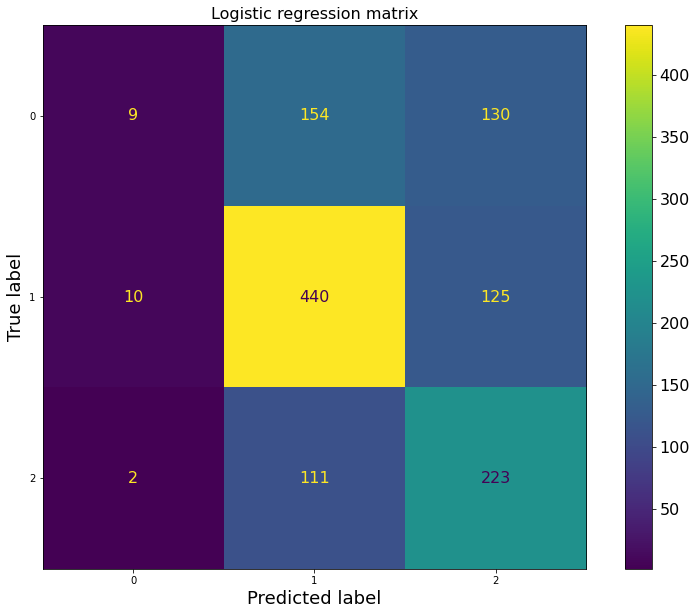

In [42]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(14, 10))
# Create the matrix
plt.rcParams.update({'font.size': 16})
cm = confusion_matrix(y_test, preds)
cmp = ConfusionMatrixDisplay(cm, display_labels=grid_search.classes_)
ax.set_title('Logistic regression matrix',fontsize=16)
ax.set_xlabel('Predicted Label',fontsize=18)
ax.set_ylabel('True Label',fontsize=18)
#ax.tick_params(axis='both', which='major', labelsize=15) 
cmp.plot(ax=ax)

plt.show();

### Saving the model and Pipeline to use in the model deployment

In [88]:
# pickling the model
import pickle
pickle_out = open("model2.pkl", "wb")
pickle.dump(grid_search, pickle_out)
pickle_out.close()

In [89]:
pickle_out2 = open("pipeline2.pkl", "wb")
pickle.dump(preprocess_pipeline, pickle_out2)
pickle_out2.close()

### Trying XGboost with hyperparameters tuning 

In [215]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV 

#splitting the data to 80% train and 20% test for features and target data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

xgb_cl = xgb.XGBClassifier()

param_xgb = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1]
}

xgb_cv = RandomizedSearchCV(xgb_cl , param_xgb,
                              n_jobs=-1, cv=5 )

xgb_cv.fit(X_train_val , y_train_val)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:38:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                          

In [216]:
predictions2 =xgb_cv.predict_proba(X_test)
preds2 = xgb_cv.predict(X_test)
np.round(predictions2,2)

array([[0.31, 0.4 , 0.29],
       [0.13, 0.8 , 0.07],
       [0.29, 0.52, 0.18],
       ...,
       [0.28, 0.43, 0.29],
       [0.22, 0.08, 0.7 ],
       [0.11, 0.83, 0.06]], dtype=float32)

In [47]:
accuracy_score(y_test,preds2)

0.5705980066445183

In [50]:
#print the classification report to get the precision and recall and f1-score
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.25      0.04      0.07       293
           1       0.60      0.86      0.70       575
           2       0.55      0.53      0.54       336

    accuracy                           0.57      1204
   macro avg       0.47      0.48      0.44      1204
weighted avg       0.50      0.57      0.50      1204



## Evaluate with shap

In [24]:
import pickle

pickle_in4 = open('model2_xgb.pkl', 'rb')
model_loaded = pickle.load(pickle_in4)
classes2 = model_loaded.classes_



In [28]:
X_train_val[:10]

array([[-4.06646072e+07, -1.58378624e+07, -2.12036327e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.75906203e+08, -5.34299329e+06,  7.41288996e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.66866982e+08,  2.93098598e+08, -1.70908817e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.00338073e+08, -1.93497995e+07,  2.08999481e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.93374884e+06, -1.34499627e+08, -2.77233165e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.64687846e+07, -7.10793931e+07, -2.25656399e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

#### Saving predictions, test target data for model performance in the web-app

In [87]:
from numpy import savetxt
savetxt('xgb_preds.csv', preds2, delimiter=',')
savetxt('xgb_ytest.csv', y_test, delimiter=',')

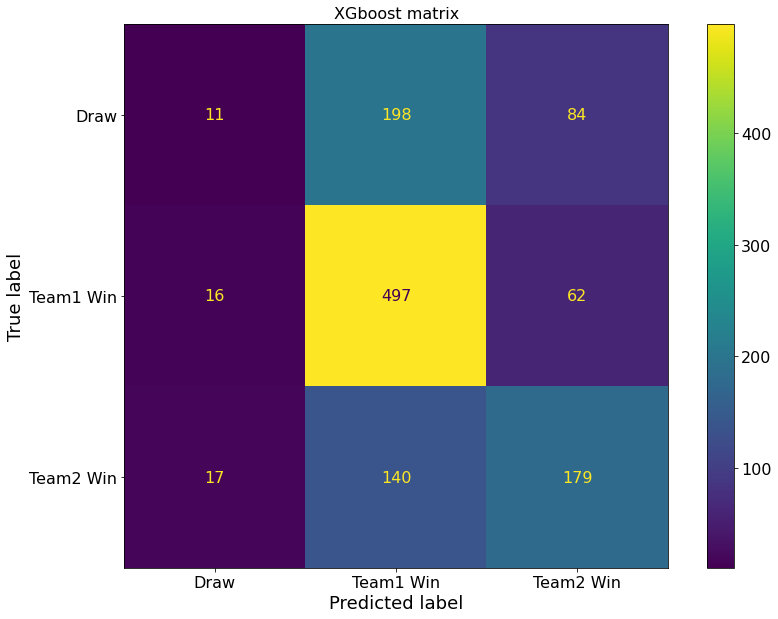

In [52]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(14, 10))
# Create the matrix
plt.rcParams.update({'font.size': 16})b
cm = confusion_matrix(y_test, preds2)
cmp = ConfusionMatrixDisplay(cm, display_labels=['Draw','Team1 Win','Team2 Win'])
ax.set_title('XGboost matrix',fontsize=16)
ax.set_xlabel('Predicted Label',fontsize=18)
ax.set_ylabel('True Label',fontsize=18)
#ax.tick_params(axis='both', which='major', labelsize=15) 
cmp.plot(ax=ax)

plt.show();

In [81]:
import pickle
pickle_out = open("model2_xgb.pkl", "wb")
pickle.dump(xgb_cv, pickle_out)
pickle_out.close()

In [62]:
pickle_in5 = open('pipeline2.pkl', 'rb')
preprocess_pipeline = pickle.load(pickle_in5)

# Testing the functions

In [103]:
#Assign values from the dataframe to the team name and retuen a dataframe with all team1 data
def assign_values_to_team1(team):
    
    if team in df_2.index :
        team1_data =  df_2.loc[team].reset_index()
        team1_data = team1_data.groupby('index').mean().reset_index().rename(columns={'index':'home_team.name'}).iloc[0]
        return team1_data

#Assign values from the dataframe to the team name and retuen a dataframe with all team2 data
def assign_values_to_team2(team):
    
    if team in df_3.index :
        team2_data =  df_3.loc[team].reset_index()
        team2_data = team2_data.groupby('index').mean().reset_index().rename(columns={'index':'away_team.name'}).iloc[0]
        return team2_data
    
#run the assign values functions and concat the resultiung 2 dataframes into one dataframe for the model input
def map_inputs_to_data(team1,team2):
    team_1 = assign_values_to_team1(team1)
    team_2 = assign_values_to_team2(team2)

    input_data = pd.concat([team_1,team_2])
    return input_data

In [206]:
s = assign_values_to_team1('USA')
pd.DataFrame(s.rename(index={'home_team.name':'Team 1'}))

,0
Team 1,USA
home_team.Rank,13
home_team. age,24.6
home_team.Total value,228000000.0
home_team.Points,1643
home_Pl,32.5
home_Age,25.6
home_MP,4.5
home_Starts,49.5
home_Min,420.0


In [207]:
s.index = s.index.str.replace('home_team.', 'Team 1 ')
s.index = s.index.str.replace('home_', '')
s.rename(index={'90s':'Avg. Minutes played' , 'Gls':'Avg. Goals','Ast':'Avg. Assists','CrdY':'Avg. Yellow Cards','CrdR':'Avg. Red Cards','Team 1 Total value':'Total Value in Million €'},inplace=True)
s = pd.DataFrame(s)
s.columns = [s.iloc[0][0]]
s.loc['Total Value in Million €'] = s.loc['Total Value in Million €']/1000000           

s = s.loc[['Team 1 Rank','Team 1  age','Total Value in Million €','Team 1 Points','Avg. Minutes played','Avg. Goals','Avg. Assists',
           'Avg. Yellow Cards','Avg. Red Cards']]
s


,USA
Team 1 Rank,13
Team 1 age,24.6
Total Value in Million €,228.0
Team 1 Points,1643
Avg. Minutes played,4.65
Avg. Goals,10.5
Avg. Assists,6.75
Avg. Yellow Cards,4.75
Avg. Red Cards,0.0


In [190]:
s.loc['Total Value in Euros'] = s.loc['Total Value in Euros']/1000000
s

,USA
Team 1 Rank,13
Team 1 age,24.6
Total Value in Euros,228.0
Team 1 Points,1643
Avg. Minutes played,4.65
Avg. Goals,10.5
Avg. Assists,6.75
Avg. Yellow Cards,4.75
Avg. Red Cards,0.0


In [64]:
#test the functions with input data
input_d = map_inputs_to_data('USA','South Korea')
input_processed = preprocess_pipeline.transform(pd.DataFrame(input_d).T)
input_processed

array([[ 5.56617949e+07, -4.03170137e+07, -3.02736525e+02,
        -6.71277138e+01, -6.57031947e+00, -1.10975085e+02,
         5.09992495e+00, -6.18168466e-01, -8.53647555e+00,
         5.43095791e+00, -4.38313300e+00,  7.57386210e-01,
        -2.15183869e-01,  1.83231075e+00,  7.56589286e-01,
         6.71406723e-02, -1.06451036e-01, -3.29978573e-01,
        -1.87316692e+00,  1.76157315e-01, -1.17211536e+00,
        -2.80004194e-01, -6.14520638e-01,  7.38453976e-01,
         4.12204483e-01,  2.26776354e-01, -1.60823492e-01,
         9.60276087e-03,  7.05677909e-02,  1.63861454e-01,
        -1.49387296e-03,  4.50366562e-03, -3.11850290e-02,
        -2.69395229e-02, -4.55921375e-03,  8.82615312e-03,
        -5.25331655e-03,  1.00013595e-02, -8.25180508e-04,
         1.82044405e-04,  4.93890847e-04, -8.41263997e-05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [68]:
pd.DataFrame(assign_values_to_team2('USA')).reset_index()

,index,0
0,away_team.name,USA
1,away_team.Rank,13
2,away_team. age,24.6
3,away_team.Total value,228000000.0
4,away_team.Points,1643
5,away_Pl,32.5
6,away_Age,25.6
7,away_MP,4.5
8,away_Starts,49.5
9,away_Min,420.0


In [55]:
preds_test = xgb_cv.predict_proba(input_processed)
preds_test

array([[0.30586484, 0.47481716, 0.21931802]], dtype=float32)

In [272]:
def predict_match_result(team1 ,team2):
    
    input_d = map_inputs_to_data(team1 , team2)
    input_processed = preprocess_pipeline.transform(pd.DataFrame(input_d).T)
    preds_test = model.predict_proba(input_processed)
    
    results_df = pd.DataFrame(columns=classes,data=np.round(preds_test,2))
    results_df.rename(columns={0:'Draw Probability',1:'{} wins Probability'.format(team1),2:'{} wins Probability'.format(team2)},inplace=True)
    return(results_df)
    
                     


## Predicting Match result (goal result)

In [90]:
#display the dataframe before dropping the scores columns
df

,date,home_team.name,home_score,home_team.Rank,home_team. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_Poss,home_MP,home_Starts,home_Min,home_90s,home_Gls,home_Ast,home_G-PK,home_PK,home_PKatt,home_CrdY,home_CrdR,home_Gls.1,home_Ast.1,home_G+A,home_G-PK.1,home_G+A-PK,away_team.name,away_score,away_team.Rank,away_team. age,away_team.Total value,away_team.Points,away_Pl,away_Age,away_Poss,away_MP,away_Starts,away_Min,away_90s,away_Gls,away_Ast,away_G-PK,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK,goal_difference,match_result
0,2010-03-03,Iran,1,21,28.1,74380000.0,1573,15.500000,27.600000,32.0,3.000000,33.000000,270.0,3.000000,1.000000,0.500000,0.500000,0.500000,0.500000,5.500000,0.0,0.330,0.165000,0.500000,0.165000,0.335,Thailand,0,112,27.4,8580000.0,1160,22.0,26.95,NaN,1.5,16.5,135.0,1.5,2.5,1.5,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
1,2013-10-15,Iran,2,21,28.1,74380000.0,1573,15.500000,27.600000,32.0,3.000000,33.000000,270.0,3.000000,1.000000,0.500000,0.500000,0.500000,0.500000,5.500000,0.0,0.330,0.165000,0.500000,0.165000,0.335,Thailand,1,112,27.4,8580000.0,1160,22.0,26.95,NaN,1.5,16.5,135.0,1.5,2.5,1.5,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
2,2013-03-17,Qatar,1,52,26.7,14430000.0,1438,21.666667,26.633333,NaN,5.333333,58.666667,480.0,5.333333,4.666667,3.333333,3.666667,1.000000,1.000000,10.333333,1.0,0.940,0.603333,1.540000,0.633333,1.230,Thailand,0,112,27.4,8580000.0,1160,22.0,26.95,NaN,1.5,16.5,135.0,1.5,2.5,1.5,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
3,2019-01-10,Bahrain,0,89,27.9,7830000.0,1264,29.666667,27.900000,NaN,5.333333,58.666667,480.0,5.333333,11.666667,5.333333,9.000000,2.666667,3.333333,5.666667,0.0,2.090,0.833333,2.926667,1.676667,2.510,Thailand,1,112,27.4,8580000.0,1160,22.0,26.95,NaN,1.5,16.5,135.0,1.5,2.5,1.5,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,2
4,2010-12-07,Indonesia,2,160,23.3,5280000.0,1002,25.500000,23.100000,NaN,2.500000,27.500000,225.0,2.500000,5.000000,1.500000,4.000000,1.000000,1.000000,3.000000,0.0,2.085,0.500000,2.585000,1.665000,2.165,Thailand,1,112,27.4,8580000.0,1160,22.0,26.95,NaN,1.5,16.5,135.0,1.5,2.5,1.5,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.50,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2011-09-02,Guyana,2,175,25.5,775000.0,959,20.000000,27.300000,NaN,2.000000,22.000000,180.0,2.000000,6.000000,4.000000,4.000000,2.000000,2.000000,3.000000,0.0,3.000,2.000000,5.000000,2.000000,4.000,Barbados,0,163,23.0,0.0,996,18.5,24.45,NaN,2.0,22.0,180.0,2.0,1.0,0.0,0.5,0.5,0.5,5.5,0.0,0.50,0.00,0.5,0.25,0.25,2,1
6015,2011-11-11,Bermuda,2,166,26.2,2830000.0,982,14.000000,25.100000,NaN,1.000000,11.000000,90.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000,Barbados,1,163,23.0,0.0,996,18.5,24.45,NaN,2.0,22.0,180.0,2.0,1.0,0.0,0.5,0.5,0.5,5.5,0.0,0.50,0.00,0.5,0.25,0.25,1,1
6016,2011-11-14,Bermuda,2,166,26.2,2830000.0,982,14.000000,25.100000,NaN,1.000000,11.000000,90.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000,Barbados,1,163,23.0,0.0,996,18.5,24.45,NaN,2.0,22.0,180.0,2.0,1.0,0.0,0.5,0.5,0.5,5.5,0.0,0.50,0.00,0.5,0.25,0.25,1,1
6017,2017-10-28,Bermuda,2,166,26.2,2830000.0,982,14.000000,25.100000,NaN,1.000000,11.000000,90.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000,Barbados,3,163,23.0,0.0,996,18.5,24.45,NaN,2.0,22.0,180.0,2.0,1.0,0.0,0.5,0.5,0.5,5.5,0.0,0.50,0.00,0.5,0.25,0.25,1,2


In [58]:
#drop unnecessary columns and columns with many null values as poss columns
df_goals = df.drop(['goal_difference','match_result','date','home_Poss','away_Poss'],axis=1)
df_goals.head()

,home_team.name,home_score,home_team.Rank,home_team. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_MP,home_Starts,...,away_G-PK,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK
0,Iran,1,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,...,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5
1,Iran,2,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,...,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5
2,Qatar,1,52,26.7,14430000.0,1438,21.666667,26.633333,5.333333,58.666667,...,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5
3,Bahrain,0,89,27.9,7830000.0,1264,29.666667,27.900000,5.333333,58.666667,...,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5
4,Indonesia,2,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,...,2.5,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5


In [59]:
#make a new columns with the final result from the home and away score columns
df_goals['match_goals_result'] = df_goals['home_score'].apply(str)  + '-' + df_goals['away_score'].apply(str)
df_goals.head()

,home_team.name,home_score,home_team.Rank,home_team. age,home_team.Total value,home_team.Points,home_Pl,home_Age,home_MP,home_Starts,...,away_PK,away_PKatt,away_CrdY,away_CrdR,away_Gls.1,away_Ast.1,away_G+A,away_G-PK.1,away_G+A-PK,match_goals_result
0,Iran,1,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,...,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5,1-0
1,Iran,2,21,28.1,74380000.0,1573,15.500000,27.600000,3.000000,33.000000,...,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5,2-1
2,Qatar,1,52,26.7,14430000.0,1438,21.666667,26.633333,5.333333,58.666667,...,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5,1-0
3,Bahrain,0,89,27.9,7830000.0,1264,29.666667,27.900000,5.333333,58.666667,...,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5,0-1
4,Indonesia,2,160,23.3,5280000.0,1002,25.500000,23.100000,2.500000,27.500000,...,0.0,0.0,2.0,0.5,1.75,0.75,2.5,1.75,2.5,2-1


In [60]:
#checking the final results unique values
df_goals['match_goals_result'].unique()

array(['1-0', '2-1', '0-1', '3-1', '1-2', '0-3', '2-0', '4-0', '1-1',
       '2-3', '3-2', '3-0', '2-2', '0-0', '6-0', '0-2', '4-1', '1-3',
       '6-2', '3-3', '1-6', '1-9', '0-5', '0-4', '1-4', '1-5', '4-2',
       '6-1', '0-7', '5-0', '8-1', '10-0', '7-0', '0-6', '2-4', '4-3',
       '5-1', '2-6', '5-2', '8-0', '3-4', '3-5', '0-8', '7-1', '5-3',
       '2-5', '4-4', '7-2', '9-0', '1-7', '11-0'], dtype=object)

In [61]:
df_goals['match_goals_result'].value_counts().index

Index(['1-0', '1-1', '0-0', '2-0', '0-1', '2-1', '1-2', '0-2', '3-0', '2-2',
       '3-1', '4-0', '0-3', '1-3', '3-2', '2-3', '4-1', '5-0', '0-4', '1-4',
       '6-0', '4-2', '5-1', '3-3', '2-4', '0-5', '6-1', '0-6', '7-0', '4-3',
       '3-4', '1-5', '8-0', '5-2', '5-3', '2-5', '7-1', '0-8', '6-2', '8-1',
       '4-4', '1-7', '0-7', '9-0', '1-6', '10-0', '3-5', '1-9', '2-6', '7-2',
       '11-0'],
      dtype='object')

<AxesSubplot:>

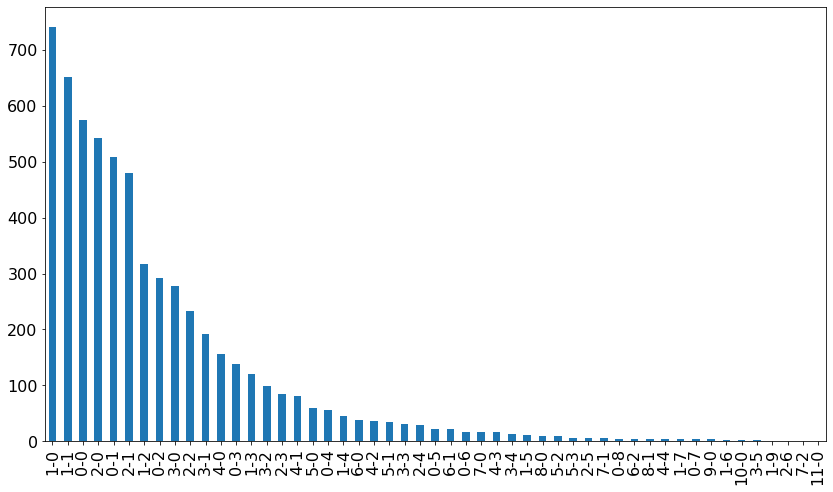

In [62]:
#checking the distribution of final result unique values
df_goals['match_goals_result'].value_counts().plot(kind='bar',figsize=(14,8))

There are many outliers that we should drop before training

In [63]:
#filter dataframe to exclude values with very low count values less than 10
df_goals = df_goals[df_goals['match_goals_result'].isin(['1-0', '1-1', '0-0', '2-0', '0-1', '2-1', '1-2', '0-2', '3-0', '2-2',
       '3-1', '4-0', '0-3', '1-3', '3-2', '2-3', '4-1', '5-0', '0-4', '1-4',
       '6-0', '4-2', '5-1', '3-3', '2-4', '0-5', '6-1', '0-6', '4-3', '3-4',
       '1-5'])]
df_goals['match_goals_result'].value_counts()

1-0    740
1-1    651
0-0    575
2-0    543
0-1    509
2-1    479
1-2    317
0-2    292
3-0    278
2-2    233
3-1    192
4-0    157
0-3    139
1-3    121
3-2     99
2-3     85
4-1     81
5-0     59
0-4     57
1-4     45
6-0     38
4-2     37
5-1     34
3-3     31
2-4     30
0-5     23
6-1     22
4-3     16
0-6     16
3-4     13
1-5     11
Name: match_goals_result, dtype: int64

In [64]:
#drop the scores columns
df_goals.drop(['home_score','away_score'],axis=1,inplace=True)

In [65]:
#rename the columns to be consistent with previous model data
df_goals.rename(columns={'home_team_Avg. age':'home_team. age'},inplace=True)
df_goals.rename(columns={'home_team':'home_team.name'},inplace=True)
df_goals.rename(columns={'away_team':'away_team.name'},inplace=True)

#split data to features and target
X_g = df_goals.drop('match_goals_result',axis=1)
y_g = df_goals['match_goals_result']

#building 2 lists for numerical and categorical columns for processing
categorical_cols = [col for col in X_g.columns if (X_g[col].dtype == 'object')]

numerical_cols = [col for col in X_g.columns if (X_g[col].dtype != 'object') ]

In [66]:
#preprocess the features data using the preprocess_pipeline function
X_g = preprocess_pipeline.fit_transform(X_g)

In [67]:
#splitting the data to 80% train and 20% test for features and target data
X_train_val2, X_test2, y_train_val2, y_test2 = train_test_split(X_g, y_g, test_size=0.20,random_state=42)

#make cross validation with hyperparameters tuning for best performance using grid search.
c_values = [300,10,0.1]
# define grid search
grid2 = dict(C=c_values)
model2 = LogisticRegression(max_iter=3000 )

grid_search2 = GridSearchCV(estimator=model2, param_grid=grid2, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)

#fitting the model on the train data
grid_search2.fit(X_train_val2 , y_train_val2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(max_iter=3000),
             n_jobs=-1, param_grid={'C': [300, 10, 0.1]}, scoring='accuracy')

In [68]:
#predicting the probabilities of each class
predictions2 =grid_search2.predict_proba(X_test2)
preds2 = grid_search2.predict(X_test2)
np.round(predictions2,3)

array([[0.042, 0.046, 0.048, ..., 0.03 , 0.028, 0.028],
       [0.027, 0.102, 0.1  , ..., 0.015, 0.013, 0.019],
       [0.03 , 0.025, 0.025, ..., 0.03 , 0.031, 0.029],
       ...,
       [0.039, 0.037, 0.039, ..., 0.03 , 0.029, 0.028],
       [0.04 , 0.039, 0.041, ..., 0.029, 0.028, 0.027],
       [0.043, 0.05 , 0.052, ..., 0.029, 0.028, 0.028]])

In [69]:
grid_search2.classes_

array(['0-0', '0-1', '0-2', '0-3', '0-4', '0-5', '0-6', '1-0', '1-1',
       '1-2', '1-3', '1-4', '1-5', '2-0', '2-1', '2-2', '2-3', '2-4',
       '3-0', '3-1', '3-2', '3-3', '3-4', '4-0', '4-1', '4-2', '4-3',
       '5-0', '5-1', '6-0', '6-1'], dtype=object)

In [70]:
#building a dataframe for each class probablility
pd.set_option('display.max_columns', 500)
results_df2 = pd.DataFrame(columns=grid_search2.classes_,data=np.round(predictions2,3))
results_df2

,0-0,0-1,0-2,0-3,0-4,0-5,0-6,1-0,1-1,1-2,1-3,1-4,1-5,2-0,2-1,2-2,2-3,2-4,3-0,3-1,3-2,3-3,3-4,4-0,4-1,4-2,4-3,5-0,5-1,6-0,6-1
0,0.042,0.046,0.048,0.038,0.033,0.032,0.031,0.036,0.031,0.040,0.035,0.033,0.030,0.033,0.028,0.028,0.031,0.030,0.028,0.029,0.030,0.029,0.029,0.028,0.028,0.029,0.030,0.028,0.030,0.028,0.028
1,0.027,0.102,0.100,0.074,0.066,0.043,0.033,0.000,0.021,0.084,0.067,0.044,0.027,0.000,0.003,0.040,0.046,0.033,0.001,0.003,0.020,0.031,0.024,0.002,0.011,0.020,0.025,0.008,0.015,0.013,0.019
2,0.030,0.025,0.025,0.025,0.024,0.026,0.027,0.082,0.029,0.024,0.024,0.026,0.027,0.067,0.040,0.025,0.025,0.027,0.048,0.040,0.029,0.027,0.028,0.042,0.031,0.028,0.028,0.033,0.030,0.031,0.029
3,0.039,0.036,0.038,0.031,0.027,0.028,0.028,0.069,0.030,0.032,0.029,0.028,0.028,0.055,0.034,0.025,0.027,0.027,0.039,0.035,0.029,0.027,0.028,0.035,0.029,0.027,0.028,0.029,0.029,0.028,0.027
4,0.022,0.018,0.017,0.023,0.027,0.029,0.031,0.041,0.032,0.021,0.025,0.028,0.032,0.043,0.042,0.033,0.030,0.031,0.045,0.040,0.033,0.033,0.033,0.041,0.037,0.035,0.033,0.039,0.034,0.037,0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,0.040,0.042,0.043,0.036,0.032,0.032,0.031,0.039,0.031,0.038,0.034,0.032,0.030,0.035,0.029,0.029,0.031,0.030,0.030,0.030,0.030,0.030,0.030,0.030,0.029,0.029,0.030,0.029,0.030,0.029,0.029
1181,0.040,0.038,0.040,0.032,0.028,0.029,0.028,0.064,0.030,0.034,0.030,0.029,0.028,0.052,0.033,0.025,0.028,0.028,0.037,0.034,0.029,0.027,0.028,0.034,0.029,0.027,0.028,0.029,0.029,0.028,0.027
1182,0.039,0.037,0.039,0.032,0.029,0.029,0.029,0.058,0.030,0.034,0.030,0.030,0.029,0.048,0.033,0.026,0.028,0.028,0.036,0.034,0.030,0.028,0.028,0.034,0.029,0.028,0.028,0.030,0.030,0.029,0.028
1183,0.040,0.039,0.041,0.032,0.028,0.029,0.028,0.064,0.030,0.034,0.030,0.029,0.028,0.052,0.032,0.025,0.027,0.027,0.037,0.034,0.029,0.027,0.028,0.034,0.028,0.027,0.028,0.029,0.029,0.028,0.027


In [71]:
#find the overall score
accuracy_score(y_test2,preds2)

0.11223628691983123

In [72]:
#print the classification report to get the precision and recall and f1-score
print(classification_report(y_test2, preds2))

              precision    recall  f1-score   support

         0-0       0.00      0.00      0.00       107
         0-1       0.15      0.04      0.06       111
         0-2       0.12      0.43      0.19        74
         0-3       0.00      0.00      0.00        23
         0-4       0.00      0.00      0.00        11
         0-6       0.00      0.00      0.00         5
         1-0       0.12      0.70      0.20       129
         1-1       0.00      0.00      0.00       147
         1-2       0.00      0.00      0.00        56
         1-3       0.00      0.00      0.00        23
         1-4       0.00      0.00      0.00         6
         1-5       0.00      0.00      0.00         7
         2-0       0.00      0.00      0.00        97
         2-1       0.25      0.03      0.05       101
         2-2       0.02      0.02      0.02        42
         2-3       0.00      0.00      0.00        23
         2-4       0.00      0.00      0.00         4
         3-0       0.06    

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

### Trying XGBoost to predict match results

In [78]:
xgb_cl2 = xgb.XGBClassifier()

param_xgb = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1]
}

xgb_cv2 = RandomizedSearchCV(xgb_cl2 , param_xgb,
                              n_jobs=-1, cv=5 )

xgb_cv2.fit(X_train_val2 , y_train_val2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:00:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                          

In [79]:
preds_xgb = xgb_cv2.predict(X_test2)

accuracy_score(y_test2,preds_xgb)

0.11814345991561181

#### Testing the model with test input data

In [185]:
input_d = map_inputs_to_data('Argentina','Brazil')
input_processed = preprocess_pipeline.transform(pd.DataFrame(input_d).T)
l1 = model_loaded.predict_proba(input_processed)
l1


array([[0.30491903, 0.47980267, 0.21527827]], dtype=float32)

In [186]:
input_d = map_inputs_to_data('Brazil','Argentina')
input_processed = preprocess_pipeline.transform(pd.DataFrame(input_d).T)
l2 = model_loaded.predict_proba(input_processed)
l2


array([[0.3063847 , 0.41319725, 0.28041807]], dtype=float32)

In [187]:
l2[0][2], l2[0][1] = l2[0][1], l2[0][2]
l2

array([[0.3063847 , 0.28041807, 0.41319725]], dtype=float32)

In [188]:
(l1+l2)/2

array([[0.30565187, 0.38011038, 0.31423777]], dtype=float32)

In [442]:
df5 = pd.DataFrame(columns=grid_search2.classes_,data=np.round(grid_search2.predict_proba(input_processed),3))

In [446]:
df5

,0-0,0-1,0-2,0-3,0-4,0-5,0-6,1-0,1-1,1-2,1-3,1-4,1-5,2-0,2-1,2-2,2-3,2-4,3-0,3-1,3-2,3-3,3-4,4-0,4-1,4-2,4-3,5-0,5-1,6-0,6-1
0,0.035,0.036,0.037,0.035,0.034,0.033,0.033,0.029,0.032,0.035,0.034,0.033,0.033,0.029,0.03,0.032,0.033,0.033,0.029,0.03,0.032,0.032,0.032,0.03,0.031,0.032,0.032,0.031,0.032,0.031,0.031


In [454]:
int(df5.columns[0][2])

0

In [464]:
# dataframe of Draws
df5[[x for x in df5.columns if (int(x[0]) == int(x[2]))]]

,0-0,1-1,2-2,3-3
0,0.035,0.032,0.032,0.032


In [463]:
# dataframe of home wins
df5[[x for x in df5.columns if (int(x[0]) > int(x[2]))]]

,1-0,2-0,2-1,3-0,3-1,3-2,4-0,4-1,4-2,4-3,5-0,5-1,6-0,6-1
0,0.029,0.029,0.03,0.029,0.03,0.032,0.03,0.031,0.032,0.032,0.031,0.032,0.031,0.031


In [462]:
#dataframe of away wins
df5[[x for x in df5.columns if (int(x[0]) < int(x[2]))]]

,0-1,0-2,0-3,0-4,0-5,0-6,1-2,1-3,1-4,1-5,2-3,2-4,3-4
0,0.036,0.037,0.035,0.034,0.033,0.033,0.035,0.034,0.033,0.033,0.033,0.033,0.032


In [443]:
len(grid_search2.classes_)

31

In [444]:
df5.loc[0].nlargest(5).values.sum()

0.17800000000000002

In [91]:
# pickling the model to use for deployment
pickle_out = open("model_goals.pkl", "wb")
pickle.dump(grid_search2, pickle_out)
pickle_out.close()

In [92]:
# pickling the model to use for deployment
pickle_out = open("model_goals_xgb.pkl", "wb")
pickle.dump(xgb_cv2, pickle_out)
pickle_out.close()